## Code Tests

**Lectures: "Statistical Methods For Rare Searches In Python"**

*Author: Jose A. Hernando*, June 2019

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind')

import htcore    as htcore
import htcatalog as htcata
import htplot    as htplot
# ploting images
from IPython.display import display, Image

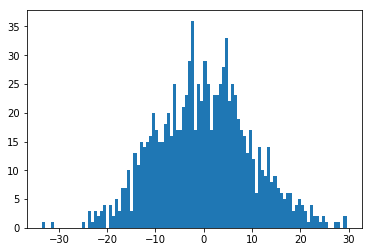

In [2]:
xs = stats.norm.rvs(*(0., 10.), size = 1000);
plt.hist(xs, 100);

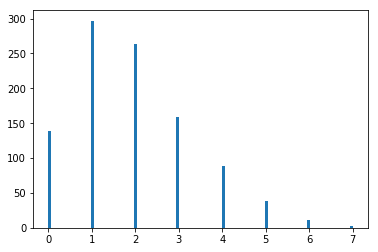

In [3]:
xs = stats.poisson.rvs(*(2,), size = 1000);
plt.hist(xs, 100);

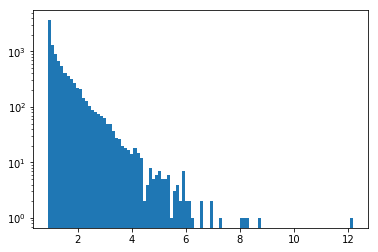

In [4]:
par, size = np.array([0., 1.]), 10000
xs =  stats.norm.rvs(*par, size = size)
lls = stats.norm.logpdf(xs, *par)
plt.hist(-lls, 100);
plt.yscale('log')

In [5]:
# test mle
par, size = np.array([3.,]), 20
xs        = stats.poisson.rvs(*par, size = size)

def test_mle(xs, llike, par, mask):
    mubest    = htcore.mle    (xs, llike, par, mask = mask)
    print('data    ', xs)
    print('par     ', par, ', mask', mask)
    print('mubest  ', mubest)
    return

mask      = None
test_mle(xs, stats.poisson.logpmf, par, mask)

mask      = np.array([True,])
test_mle(xs, stats.poisson.logpmf, par, mask)

data     [3 3 3 2 6 4 6 2 2 4 5 5 5 5 1 5 4 3 2 4]
par      [3.] , mask None
mubest   [3.69997559]
data     [3 3 3 2 6 4 6 2 2 4 5 5 5 5 1 5 4 3 2 4]
par      [3.] , mask [ True]
mubest   [3.69997559]


In [6]:
# test mle
par, size = np.array([0., 2.]), 20
xs        = stats.norm.rvs(*par, size = size)

mask      = None
test_mle(xs, stats.norm.logpdf, par, mask)

mask      = np.array([True, True])
test_mle(xs, stats.norm.logpdf, par, mask)

mask      = np.array([True, False])
test_mle(xs, stats.norm.logpdf, par, mask)

mask      = np.array([False, True])
test_mle(xs, stats.norm.logpdf, par, mask)

data     [ 2.43206466 -0.08449303  2.25684125  1.19642861  1.49243382 -0.69938347
  0.05345796 -1.5304814  -0.88113128  0.15743792  1.87211675 -1.57846517
 -1.31439881 -0.57088271 -1.75845807 -0.45667893  2.54782716  0.05763712
  1.87791595  0.51944772]
par      [0. 2.] , mask None
mubest   [0.27945408 1.3854696 ]
data     [ 2.43206466 -0.08449303  2.25684125  1.19642861  1.49243382 -0.69938347
  0.05345796 -1.5304814  -0.88113128  0.15743792  1.87211675 -1.57846517
 -1.31439881 -0.57088271 -1.75845807 -0.45667893  2.54782716  0.05763712
  1.87791595  0.51944772]
par      [0. 2.] , mask [ True  True]
mubest   [0.27945408 1.3854696 ]
data     [ 2.43206466 -0.08449303  2.25684125  1.19642861  1.49243382 -0.69938347
  0.05345796 -1.5304814  -0.88113128  0.15743792  1.87211675 -1.57846517
 -1.31439881 -0.57088271 -1.75845807 -0.45667893  2.54782716  0.05763712
  1.87791595  0.51944772]
par      [0. 2.] , mask [ True False]
mubest   [0.2794375]
data     [ 2.43206466 -0.08449303  2.25684125 

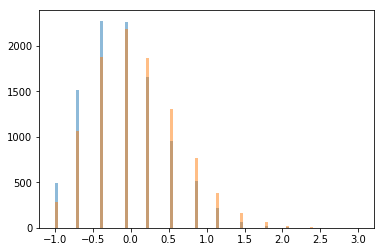

In [7]:
# test htsimple
mu0, mu1, size = 3., 3.5, 10000
ht = htcore.htsimple(stats.poisson(mu0), stats.poisson(mu1), size)
qrange = ht.qrange()
plt.hist(ht.q0s, 100, range = qrange, alpha = 0.5);
plt.hist(ht.q1s, 100, range = qrange, alpha = 0.5);

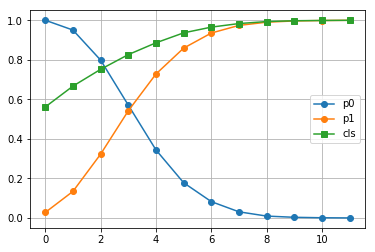

In [8]:
# thest p0, p1 cls from htsimple
ns  = np.arange(12)
qs  = [ht.q(ni)       for ni in ns]
p0s = [ht.p0value(qi) for qi in qs]
p1s = [ht.p1value(qi) for qi in qs]
cls = [ht.cls    (qi) for qi in qs]
plt.plot(ns, p0s, marker = 'o', label = 'p0')
plt.plot(ns, p1s, marker = 'o', label = 'p1')
plt.plot(ns, cls, marker = 's', label = 'cls');
plt.legend(); plt.grid();

In [9]:
def test_tmu(ht, x, par, mask, mu, mu0):
    parbest   = ht.parbest(x)
    parmubest = ht.parmubest(x, mu)
    tmu     = ht.tmu(x, mu)
    qmu     = ht.qmu(x, mu)
    q0      = ht.q0 (x, mu0)
    print('data      ', x)
    print('par       ', par)
    print('parbest   ', parbest )
    print('parmubest ', parmubest, 'at mu ', mu)
    print('tmu z', tmu, np.sqrt(tmu), ' at mu  ', mu)
    print('qmu z', qmu, np.sqrt(qmu), ' at mu  ', mu)
    print('q0  z', q0 , np.sqrt(q0) ,' at mu0 ', mu0)
    return

In [15]:
# test tmu poisson
rv = stats.poisson
mu0, mu, size = 3., 3.5, 1
par, mask     = np.array([mu0,]), None,
xs= rv.rvs(*par, size= size)
ht = htcore.htcomposite(rv, par, mask = mask)
test_tmu(ht, xs, par, mask, mu, mu0)

data       [3]
par        [3.]
parbest    [3.]
parmubest  [3.5] at mu  3.5
tmu z 0.07509592103644991 0.2740363498451436  at mu   3.5
qmu z 0.07509592103644991 0.2740363498451436  at mu   3.5
q0  z 0.0 0.0  at mu0  3.0


In [14]:
# test tmu normal - mean only
rv = stats.norm
mu0, mu, sigma, size     = 0., 3., 1., 1
par, mask, masknu = np.array([mu0, sigma]), np.array([True, False]), None
xs = rv.rvs(*par, size = size)
ht = htcore.htcomposite(rv, par, mask = mask)
test_tmu(ht, xs, par, mask, mu, mu0)

data       [0.07923398]
par        [0. 1.]
parbest    [0.07925 1.     ]
parmubest  [3. 1.] at mu  3.0
tmu z 8.53087413411819 2.920766018379115  at mu   3.0
qmu z 8.53087413411819 2.920766018379115  at mu   3.0
q0  z 0.006278023579948 0.07923397995776812  at mu0  0.0


In [16]:
# test tmu norm nuisance
rv = stats.norm
par, mask, masknu = [0., 1.], [True, True], [False, True]
mu0, mu, size     =  0., 0.3, 100
xs = rv.rvs(*par, size = size)
ht = htcore.htcomposite(rv, par, mask = mask, masknu = masknu)
test_tmu(ht, xs, par, mask, mu, mu0)

data       [-0.20713332 -0.40063479 -1.72801874  1.83952837 -0.49193257 -0.1588714
 -0.04745803 -0.11944613 -0.82038315 -2.02424735 -0.1745278   0.53908166
  1.5271436  -0.74834044 -1.23998233 -0.35424835  0.48921635 -0.57302525
  1.30322186 -0.2616017  -0.83681591 -2.43217545  0.99326399 -0.36395193
 -0.2470316  -0.33271247  0.00610063  0.94262979 -0.86812443  0.11695758
 -1.04181515  1.03764288 -0.7938458   2.41377025 -0.46584472 -0.16896809
 -0.31745587  1.68842804  0.11930485  0.82290796 -0.90853238 -0.34807327
 -0.57503072  0.50155177  0.80659636  1.71737644 -0.14903206 -0.4657395
 -0.09986134 -1.07308402 -0.05929232  0.15641394  0.10472708  0.57540585
 -1.75143899  0.47210691  0.8033611   0.52463627  1.15145111 -1.93345888
 -0.70074358  1.04868601  1.39797602 -2.5350866  -0.03195544  0.45211188
  0.37913081 -0.22842527 -0.73085748 -1.24194088 -0.81215563  1.75617246
  0.36056986  0.0309441   2.41485221 -0.13531976 -0.28084858 -1.02286257
 -1.18546609  1.83817275 -0.82860245 -0.87

In [17]:
# test tmu norm nuisance - sigma 
rv = stats.norm
par, mask, masknu = [0., 1.], (True, True), (True, False)
mu0, mu, size     =  1., 2.,  2
xs = rv.rvs(*par, size = size)
ht = htcore.htcomposite(rv, par, mask = mask, masknu = masknu)
test_tmu(ht, xs, par, mask, mu, mu0)

data       [-0.38490872 -0.81982665]
par        [0.0, 1.0]
parbest    [-0.6023396   0.21744772]
parmubest  [-0.602375  2.      ] at mu  2.0
tmu z 6.899213351928005 2.6266353671432974  at mu   2.0
qmu z 6.899213351928005 2.6266353671432974  at mu   2.0
q0  z 0.0 0.0  at mu0  1.0


In [27]:
# test tmu with mu0 with poisson FC example
rv = stats.poisson
mu0, mu, size = 3., 3.5, 1000
x0 = 0.
xs = rv.rvs(mu, size = size)
ht = htcore.htcomposite(stats.poisson, mu)
ts = [ht.tmu(xi, mu, mu0) for xi in xs]
t0 =  ht.tmu(x0, mu, mu0)

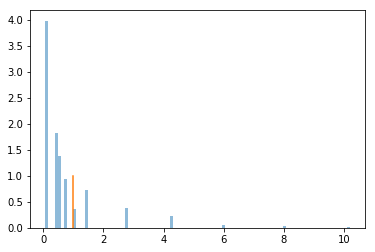

In [28]:
cont, _, _ = plt.hist(ts, 100, density = True, alpha = 0.5);
plt.plot((t0, t0), (0, 1.));

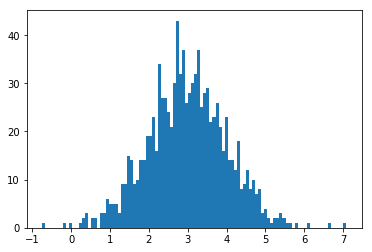

In [29]:
# test tmu, qmu, q0 with normal
rv = stats.norm
mu0, mu, mut, size = 0., 3., 3., 1000
par, mask     = (mut, 1.), (True, False)
xs = rv.rvs(*par, size = size)
#plt.hist(xs, 100);
ht = htcore.htcomposite(rv, par, mask = mask)
mus = [ht.parbest(xi)[0] for xi in xs]
plt.hist(mus, 100);
ts  = [ht.tmu(xi, mut) for xi in xs]

chi2  1.0235001642249513
p-value mean : 0.49658698421011094 ; std * sqrt(12.) : 1.0040285365598818


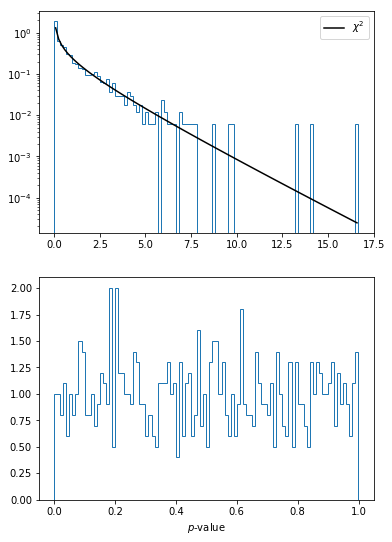

In [30]:
ts  = [ht.tmu(xi, mut) for xi in xs]
htplot.chi2_test(ts);

chi2  0.2609497673493911
p-value mean : 0.2530900006423041 ; std * sqrt(12.) : 1.1191792267197982


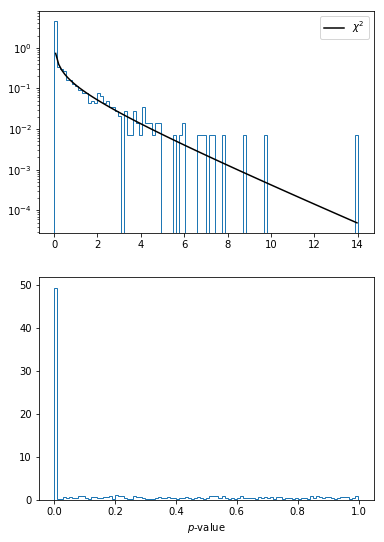

In [31]:
ts  = [ht.qmu(xi, mut) for xi in xs]
htplot.chi2_test(ts, factor = 0.5);

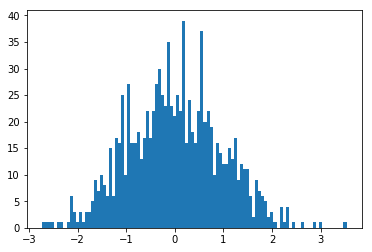

In [32]:
mu0 = 0.
par = np.array([mu0, 1.])
xs = rv.rvs(*par, size = size)
#plt.hist(xs, 100);
ht = htcore.htcomposite(rv, par, mask = mask)
mus = [ht.parbest(xi)[0] for xi in xs]
plt.hist(mus, 100);

chi2  0.2389516210455078
p-value mean : 0.24704201638593476 ; std * sqrt(12.) : 1.1103908536857012


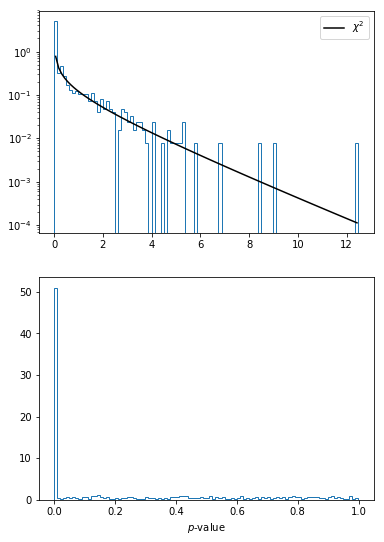

In [33]:
ts  = [ht.q0(xi, mu0) for xi in xs]
htplot.chi2_test(ts, factor = 0.5);

In [34]:
mu0, mu, par, size, size = 0., 1., (0., 1.), 1, 1000
mask = [True, False]
rv = stats.norm
x0 = rv.rvs(*par, size)
ht = htcore.htcomposite(rv, par, mask = mask)

In [35]:
x0 = .2
print('data ', x0)
p0, t0, ts     = ht.tmu_pvalue_rvs(x0, mu, size = size)
print('rvs  ', p0, t0)

data  0.2
rvs   0.431 0.6400000000000001


In [37]:
tmu, qmu, q0 = ht.tmu(x0, mu), ht.qmu(x0, mu), ht.q0(x0, mu0)
print(' p-tmu ', tmu, htcore.tmu_pvalue(tmu))
print(' p-qmu ', qmu, htcore.qmu_pvalue(qmu))
print(' p-qmu ', q0 , htcore.q0_pvalue (q0 ))

 p-tmu  0.6400000000000001 0.4237107971667933
 p-qmu  0.6400000000000001 0.21185539858339664
 p-qmu  0.040000000000000036 0.4207402905608969


### catalog - poisson control signal

In [38]:
## Test poisson control signal
par, size = np.array((10., 2., 10.)), 100
mask = [True, True, False]
rv = htcata.poisson_control_signal
xs = rv.rvs(*par, size = size)
xs = xs[0] if size == 1 else xs
test_mle(xs, rv.logpdf, par, mask)

data     [(18.0, 9.0), (21.0, 11.0), (22.0, 10.0), (29.0, 11.0), (20.0, 8.0), (21.0, 14.0), (18.0, 10.0), (21.0, 11.0), (23.0, 9.0), (15.0, 20.0), (18.0, 8.0), (22.0, 7.0), (27.0, 15.0), (29.0, 18.0), (20.0, 13.0), (23.0, 18.0), (15.0, 8.0), (20.0, 14.0), (24.0, 8.0), (21.0, 6.0), (21.0, 12.0), (18.0, 8.0), (17.0, 16.0), (8.0, 9.0), (23.0, 15.0), (18.0, 11.0), (26.0, 11.0), (18.0, 9.0), (18.0, 6.0), (27.0, 12.0), (20.0, 10.0), (20.0, 16.0), (21.0, 9.0), (17.0, 17.0), (16.0, 11.0), (19.0, 8.0), (16.0, 15.0), (21.0, 10.0), (20.0, 12.0), (23.0, 11.0), (21.0, 17.0), (18.0, 13.0), (24.0, 14.0), (19.0, 13.0), (22.0, 11.0), (16.0, 16.0), (12.0, 17.0), (23.0, 11.0), (22.0, 14.0), (21.0, 15.0), (20.0, 8.0), (21.0, 11.0), (20.0, 19.0), (20.0, 10.0), (20.0, 16.0), (10.0, 10.0), (16.0, 19.0), (21.0, 20.0), (20.0, 7.0), (17.0, 9.0), (21.0, 11.0), (18.0, 9.0), (14.0, 13.0), (29.0, 8.0), (18.0, 9.0), (19.0, 13.0), (15.0, 10.0), (24.0, 17.0), (20.0, 14.0), (23.0, 10.0), (19.0, 14.0), (18.0, 9.0), (17.

In [39]:
## Test poisson control signal
ss, bb, mu, size = (10, 3), (1, 1), 1., 100
par = np.array([mu,])
rv  = htcata.poisson_ncounter(ss, bb, mu)
xs  = rv.rvs(*par, size = size)
mask = None
test_mle(xs, rv.logpdf, par, mask)

data     [[12, 4], [7, 3], [11, 2], [19, 3], [11, 1], [11, 8], [8, 3], [9, 5], [5, 5], [11, 13], [11, 1], [15, 5], [8, 6], [8, 3], [13, 3], [9, 3], [10, 4], [8, 3], [12, 3], [11, 4], [14, 6], [12, 6], [11, 2], [9, 6], [15, 3], [9, 1], [9, 2], [16, 4], [14, 6], [10, 5], [11, 2], [8, 2], [7, 5], [9, 4], [11, 6], [10, 3], [10, 1], [9, 8], [11, 4], [10, 5], [12, 0], [10, 4], [13, 5], [13, 6], [20, 6], [9, 5], [20, 4], [7, 4], [11, 7], [14, 6], [15, 0], [12, 2], [9, 3], [16, 3], [15, 5], [10, 7], [10, 2], [12, 4], [8, 3], [11, 4], [10, 1], [8, 3], [8, 8], [6, 1], [8, 1], [15, 4], [18, 4], [10, 6], [16, 4], [11, 3], [7, 4], [15, 5], [13, 6], [9, 5], [12, 4], [9, 2], [7, 4], [12, 7], [14, 4], [19, 5], [7, 4], [10, 2], [12, 3], [11, 4], [9, 6], [17, 2], [13, 7], [11, 3], [14, 7], [15, 8], [10, 8], [11, 2], [5, 5], [12, 1], [10, 2], [13, 2], [11, 4], [8, 3], [9, 2], [7, 1]]
par      [1.] , mask None
mubest   [0.82236328]


data     [4.57870875 1.78661807 1.48248451 2.15636228 1.21484805 1.07030553
 4.41068023 3.38834599 1.6199681  3.16308289 3.06471006 1.97420634
 1.71571655 1.05682431 2.60171198 2.01351194 1.05251849 1.99571184
 1.47271164 3.04881491 1.43459381 2.60491757 4.01157508 1.36923279
 3.06337532 1.6076252  1.77698397 1.87109878 4.69926563 1.6653925
 1.29374276 3.47972255 1.51650241 1.37270431 2.09068557 1.20538067
 3.73625045 1.75627318 4.42842431 1.55656083 1.82572656 1.37349855
 1.38264274 1.07737527 1.63406516 1.59697825 2.68554176 1.03044714
 4.31547203 1.47193693 3.16254979 1.15300309 1.26285093 1.04698632
 1.30374317 1.42025594 1.05318112 1.64026989 1.29197163 1.1124167
 1.20598246 2.279537   3.60996759 3.37869235 4.69971528 1.46024505
 1.01150253 1.13286144 2.23769356 5.56779591 3.02721892 1.61351379
 1.96311609 1.05738936 2.23097198 1.26104688 1.10358436 2.49627923
 1.10214034 1.40503294 1.3872124  1.10908023 1.57517786 2.39048449
 6.4396675  2.87981261 1.02600801 4.13824076 1.94915684

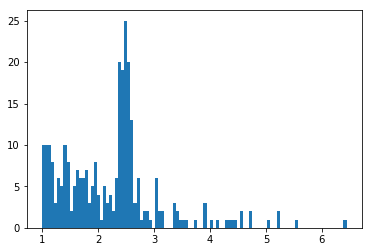

In [43]:
## Test ext norm expon 
nug, nue, tau, mug, sigmag = 100., 200., 1., 2.5, 0.1
par = np.array([nug, nue, tau, mug, sigmag])
rv  = htcata.extended_norm_expon
mask = [True, True, False, True, False]
xs  = rv.rvs(*par)[0]
plt.hist(xs, 100);
test_mle(xs, rv.logpdf, par, mask)

100.0 200.0 5.0 2.5 0.1 1
data     [1.75789212e+00 2.61348665e+00 4.85305180e+00 4.26986090e+00
 1.45624110e+00 4.45305620e+00 4.24675492e+00 3.87595895e+00
 5.66425149e-01 3.29093188e+00 4.57363032e+00 3.39304440e+00
 1.48254558e+00 1.77333908e+00 4.79022081e+00 1.52082396e+00
 4.75675502e+00 4.92297135e+00 1.50988776e+00 3.14747741e+00
 1.88564400e+00 3.94547648e-01 9.26881809e-01 4.46358515e-01
 4.65193710e+00 2.25909835e+00 1.52710947e+00 4.17139968e+00
 2.08952348e+00 1.21201820e+00 1.10372150e+00 2.79945883e+00
 4.44569628e+00 2.57238584e-01 1.85811365e-01 5.27705259e-01
 4.41995742e+00 2.22475444e+00 3.87455440e+00 3.87732798e+00
 6.01895814e-01 2.39508612e+00 8.55249491e-01 1.31903929e+00
 8.75125956e-01 1.43650832e+00 1.06423590e+00 3.37372680e-01
 1.46059491e-01 4.38760805e+00 3.85948213e+00 4.87718828e+00
 9.89163475e-01 1.19923557e-01 6.23793584e-01 1.43128868e+00
 3.33178850e+00 7.47954119e-01 4.68336570e+00 2.38539747e+00
 1.35348158e+00 4.90586356e+00 1.17230039e-01 3.69

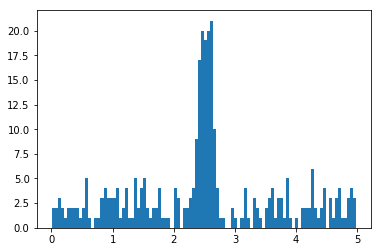

In [48]:
## Test ext norm uniform 
nug, nue, tau, mug, sigmag = 100., 200., 5., 2.5, 0.1
par = np.array([nug, nue, tau, mug, sigmag])
rv  = htcata.extended_norm_uniform
mask = [True, True, False, True, False]
xs  = rv.rvs(*par)[0]
plt.hist(xs, 100);
test_mle(xs, rv.logpdf, par, mask)

100.0 200.0 5.0 2.5 0.1 1
parbest  [1.02493158e+02 1.95506891e+02 5.00000000e+00 2.50000000e+00
 1.00000000e-01]
tmu  0.05046191086080398 0.8222614550336376
qmu  0.0 1.0
q0   0.05046191086080398 0.4111307275168188


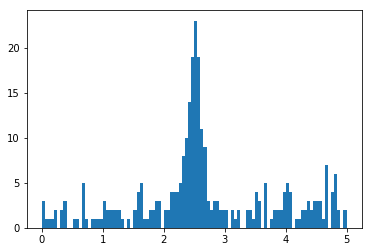

In [49]:
## Test ext norm uniform 
nug, nue, tau, mug, sigmag = 100., 200., 5., 2.5, 0.1
par = np.array([nug, nue, tau, mug, sigmag])
rv  = htcata.extended_norm_uniform
mask   = np.array([True , True, False, False, False])
masknu = np.array([False, True, False, False, False])
xs  = rv.rvs(*par)[0]
plt.hist(xs, 100);
ht      = htcore.htcomposite(rv, par, mask = mask, masknu = masknu)
parbest = ht.parbest(xs)
print('parbest ', parbest)
tmu = ht.tmu(xs, nug);
print('tmu ', tmu, htcore.tmu_pvalue(tmu))
qmu = ht.qmu(xs, nug);
print('qmu ', qmu, htcore.tmu_pvalue(qmu))
q0  = ht.q0 (xs, nug);
print('q0  ', q0 , htcore.q0_pvalue (q0))
#mu = 100.
#p0, z0, pm, pb = ht.tmu_pvalue(xs, mu);
#print(p0, z0, pm, pb)
#parbest = htcorenew.mle(xs, rv.llike, par, mask = mask);
#print('par     ', par)
#print('parbest ', parbest)

100.0 200.0 5.0 2.5 0.1 1000
chi2  0.9895629049609711
p-value mean : 0.49333995488959187 ; std * sqrt(12.) : 0.9965471057157785


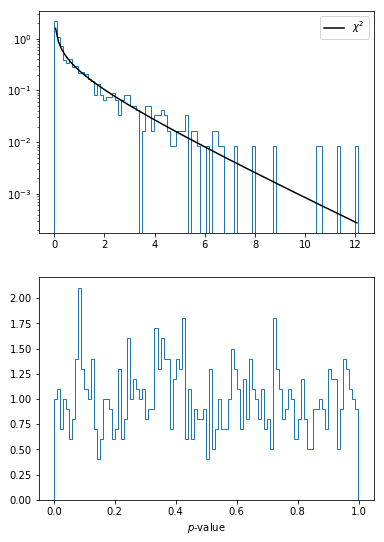

In [50]:
size = 1000
xs = rv.rvs(*par, size = size)
ts = [ht.tmu(xi, nug) for xi in xs] 
htplot.chi2_test(ts);

In [60]:
# Test hsimple poisson ncounter
b, s, size = np.array((2., 1.5, 1., 0.5)), np.array((1., 2., 2., 1.)), 1000
h0, h1 = htcata.poisson_ncounter(b), htcata.poisson_ncounter(b + s)
ht     = htcore.htsimple(h0, h1, size)

q0  -6.378139567567342
observed data : [[0, 1, 1, 0]]
H0 p-value    : 0.663
H1 p-value    : 0.009
CLs           : 0.02670623145400593


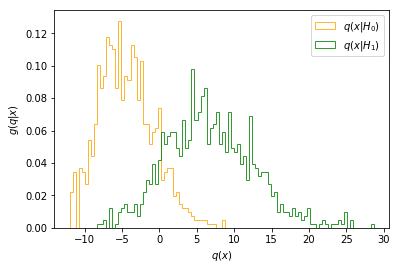

In [61]:
x0 = h0.rvs()
htplot.plt_htsimple(ht, x0 = x0)

In [306]:
# Test CI in tmu - gauss 
rv      = stats.norm
mut, sigma, size = 0., 1., 1
par, mask        = (mut, sigma), (True, False)
x0      = rv.rvs(*par, size = size)
ht      = htcore.htcomposite(rv, par, mask = mask)
parbest = ht.parbest(x0)
mubest  = ht.mubest (x0)
tmu     = ht.tmu(x0, mut, parbest = parbest)
qmu     = ht.qmu(x0, mut, parbest = parbest)
print('x0 '     , x0)
print('parbest ', parbest)
print('mubest  ', mubest)
print('tmu     ', tmu, 'at mu', mut)
print('qmu     ', qmu, 'at mu', mut)

x0  [-0.01131221]
parbest  [-0.0113125  1.       ]
mubest   [-0.0113125]
tmu      0.00012796619543431476 at mu 0.0
qmu      0.00012796619543431476 at mu 0.0


In [311]:
beta = 0.90
ci      = ht.tmu_cint(x0, beta = beta)
print('CI          ', ci, 'for x0 ', x0, ' at ', beta)
up      = ht.qmu_ulim(0., beta = beta)
print('upper limit ', up, 'for x0 ', x0, ' at ', beta)
print('check : ', stats.norm(x0, 1.).cdf(up))
print('check: ', stats.norm(x0, 1.).cdf(ci[1]) - stats.norm(x0, 1.).cdf(ci[0]))

CI           [-1.65616584  1.63354141] for x0  [-0.01131221]  at  0.9
qmu_ulim:  [1.28155157]
upper limit  [1.28155157] for x0  [-0.01131221]  at  0.9
check :  [0.90197091]
check:  [0.9]


In [334]:
# Test CI in tmu - gauss- mean and sigma - nsize!
rv      = stats.norm
mut, sigma, size  = 0., 1., 100
par, mask, masknu = (mut, sigma), (True, True), (False, True)
x0      = rv.rvs(*par, size = size)
ht      = htcore.htcomposite(rv, par, mask = mask, masknu = masknu)
parbest = ht.parbest(x0)
mubest  = ht.mubest (x0)
tmu     = ht.tmu(x0, mut, parbest = parbest)
qmu     = ht.qmu(x0, mut, parbest = parbest)
print('x0 '     , x0)
print('parbest ', parbest)
print('mubest  ', mubest)
print('tmu     ', tmu, 'at mu', mut)
print('qmu     ', qmu, 'at mu', mut)

x0  [ 0.38368177  0.17203194  0.04782784  0.85517595  0.64683444  1.48376821
  1.9640456  -0.80076675 -0.81398459 -0.66146622 -0.87473601 -1.06914013
 -0.28562062 -1.20626142 -1.517811   -0.15096686 -0.09254248 -0.74944196
  0.75781999  0.78069872  0.50015382 -0.66431805 -1.55173099  0.95213043
  1.01651861  0.72593318  0.46479254  1.45794552 -0.97817055 -0.2242478
 -0.66446747 -1.00165343  0.70637624  0.4114271  -0.06798425  0.46247405
 -0.28493364 -0.84305349 -0.98265784 -1.24441218 -0.85546729 -0.88618021
  0.59955881 -1.63300084  0.93744107  0.6333969   0.28878737  0.99325892
 -0.37400943 -0.91805576  2.86968925 -0.42788257  0.87917982  0.15347294
 -1.02616004  0.97337598 -0.81862462 -1.70537784  1.79914757 -2.29426033
 -0.0674484  -0.04960214  0.16702864 -0.45018234 -0.33080372 -0.44916978
 -1.95045417  0.10430443 -0.86287208  0.63776328  0.96431917 -0.6230333
  0.11074845  1.11756318  0.14391729 -0.73129149  0.91820813  0.65146121
 -1.04370753  2.02586236  1.0210374  -1.98839679 

In [336]:
beta = 0.68
ci      = ht.tmu_cint(x0, beta = beta)
print('CI          ', ci, 'for x0 ',' at ', beta)
up      = ht.qmu_ulim(x0, beta = beta)
print('upper limit ', up, 'for x0 ',' at ', beta)
xmu, xsigma = parbest[0],parbest[1]/np.sqrt(1.*size)
print('check : ', stats.norm(xmu, xsigma).cdf(up))
print('check: ', stats.norm(xmu, xsigma).cdf(ci[1]) - stats.norm(xmu, xsigma).cdf(ci[0]))

CI           [-0.19486146  0.01292796] for x0   at  0.68
upper limit  [-0.04219861] for x0   at  0.68
check :  [0.68000094]
check:  0.6811858381271697


In [10]:
stats.norm.cdf(-1.28)

0.10027256795444206